In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data Files
app = pd.read_csv("application_data.csv")
prev_app = pd.read_csv("previous_application.csv")

In [3]:
app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
app.shape

(307511, 122)

In [5]:
# Checking Columns which are having nulll values > 30%
to_drop = ((app.isnull().sum()/app.shape[0])*100)[((app.isnull().sum()/app.shape[0])*100) > 30]
to_drop

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50

In [6]:
to_drop_list = to_drop.to_frame().index.tolist()
to_drop_list.extend(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR'])

In [7]:
app.shape

(307511, 122)

In [8]:
# Lets drop the columns having null values > 30%
app.drop(to_drop_list, axis = 1, inplace = True)
app.shape

(307511, 46)

In [9]:
# Checking for columns containing null values
((app.isnull().sum()/app.shape[0])*100)[((app.isnull().sum()/app.shape[0])*100) > 0]

AMT_ANNUITY                  0.003902
AMT_GOODS_PRICE              0.090403
NAME_TYPE_SUITE              0.420148
CNT_FAM_MEMBERS              0.000650
EXT_SOURCE_2                 0.214626
EXT_SOURCE_3                19.825307
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
DAYS_LAST_PHONE_CHANGE       0.000325
dtype: float64

In [10]:
app.dropna(axis = 0, inplace = True)
(app.isnull().sum()/app.shape[0])*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT

In [11]:
app.keys()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [12]:
app['Target_Count'] = 1
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Target_Count
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,1
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,1


In [13]:
# Lets analyze Categorical Values.
app.dtypes[app.dtypes == 'object']

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
dtype: object

In [14]:
# Distribution of Target variable
app.TARGET.value_counts(normalize = True).sort_values()

1    0.077911
0    0.922089
Name: TARGET, dtype: float64

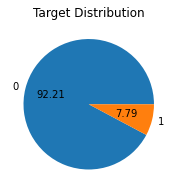

In [15]:
plt.figure(figsize=(3, 3))
plt.pie(app['TARGET'].value_counts(), 
        labels = app['TARGET'].value_counts().keys().tolist(), autopct="%.2f")
plt.ylabel("")
plt.title("Target Distribution")
plt.show()

In [16]:
app['TARGET'].value_counts().keys().tolist()

[0, 1]

In [17]:
app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         222308
Revolving loans     21972
Name: NAME_CONTRACT_TYPE, dtype: int64

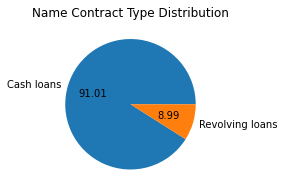

In [18]:
plt.figure(figsize=(3, 3))
plt.pie(app['NAME_CONTRACT_TYPE'].value_counts(), 
        labels = app['NAME_CONTRACT_TYPE'].unique().tolist(), autopct="%.2f")
plt.ylabel("")
plt.title("Name Contract Type Distribution")
plt.show()

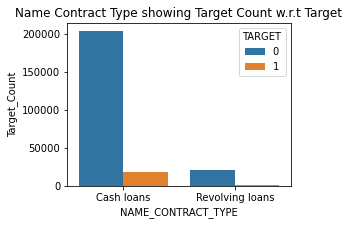

In [19]:
plt.figure(figsize=(4, 3))
sns.barplot(x="NAME_CONTRACT_TYPE",y="Target_Count",hue="TARGET",data = app, estimator = np.sum)
plt.title("Name Contract Type showing Target Count w.r.t Target")
plt.show()

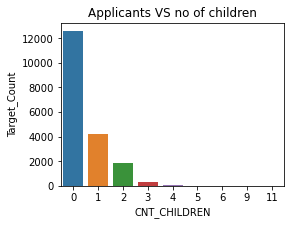

In [20]:
plt.figure(figsize=(4, 3))
sns.barplot(x="CNT_CHILDREN",y="Target_Count",data = app[app.TARGET == 1], estimator = np.sum)
plt.title("Applicants VS no of children")
plt.show()

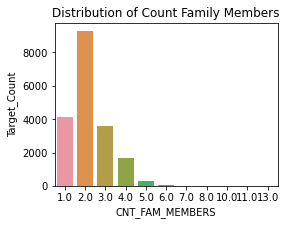

In [21]:
plt.figure(figsize=(4, 3))
sns.barplot(x="CNT_FAM_MEMBERS",y="Target_Count",data = app[app.TARGET == 1], estimator = np.sum)
plt.title("Distribution of Count Family Members")
plt.show()

In [22]:
app.CODE_GENDER.value_counts()

F      162361
M       81915
XNA         4
Name: CODE_GENDER, dtype: int64

In [23]:
app.drop(app.loc[app["CODE_GENDER"] == "XNA"].index, axis = 0, inplace = True)
app.shape

(244276, 47)

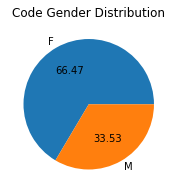

In [24]:
plt.figure(figsize=(3, 3))
plt.pie(app['CODE_GENDER'].value_counts(), 
        labels = app['CODE_GENDER'].value_counts().keys().tolist(), autopct="%.2f")
plt.ylabel("")
plt.title("Code Gender Distribution")
plt.show()

In [25]:
app.Target_Count.astype('float64')

0         1.0
2         1.0
5         1.0
6         1.0
7         1.0
         ... 
307503    1.0
307505    1.0
307508    1.0
307509    1.0
307510    1.0
Name: Target_Count, Length: 244276, dtype: float64

In [26]:
app.AMT_INCOME_TOTAL.dtype

dtype('float64')

In [27]:
app.groupby(['TARGET','CODE_GENDER'])['Target_Count'].sum()

TARGET  CODE_GENDER
0       F              151299
        M               73945
1       F               11062
        M                7970
Name: Target_Count, dtype: int64

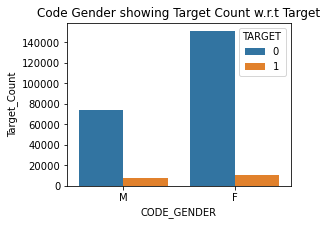

In [28]:
plt.figure(figsize=(4, 3))
sns.barplot(x="CODE_GENDER",y="Target_Count",hue="TARGET",data = app, estimator = np.sum)
plt.title("Code Gender showing Target Count w.r.t Target")
plt.show()

In [29]:
app.FLAG_OWN_CAR.value_counts().sort_values()

Y     85489
N    158787
Name: FLAG_OWN_CAR, dtype: int64

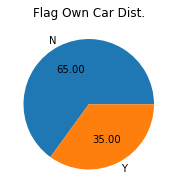

In [30]:
plt.figure(figsize=(4, 3))
plt.pie(app['FLAG_OWN_CAR'].value_counts(), 
        labels = app['FLAG_OWN_CAR'].unique().tolist(), autopct="%.2f")
plt.ylabel("")
plt.title("Flag Own Car Dist.")
plt.show()

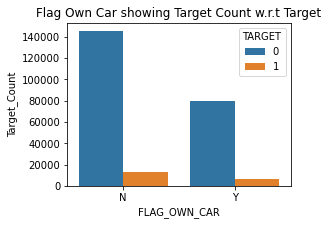

In [31]:
plt.figure(figsize=(4, 3))
sns.barplot(x="FLAG_OWN_CAR",y="Target_Count",hue="TARGET",data = app, estimator = np.sum)
plt.title("Flag Own Car showing Target Count w.r.t Target")
plt.show()

In [32]:
app.FLAG_OWN_REALTY.value_counts().sort_values()

N     75337
Y    168939
Name: FLAG_OWN_REALTY, dtype: int64

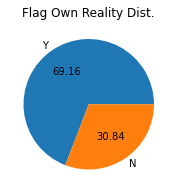

In [33]:
plt.figure(figsize=(3, 3))
plt.pie(app['FLAG_OWN_REALTY'].value_counts(), 
        labels = app['FLAG_OWN_REALTY'].unique().tolist(), autopct="%.2f")
plt.ylabel("")
plt.title("Flag Own Reality Dist.")
plt.show()

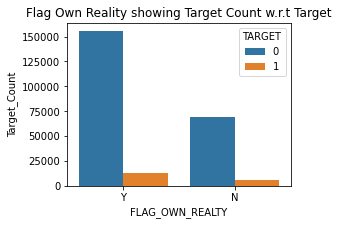

In [34]:
plt.figure(figsize=(4, 3))
sns.barplot(x="FLAG_OWN_REALTY",y="Target_Count",hue="TARGET",data = app, estimator = np.sum)
plt.title("Flag Own Reality showing Target Count w.r.t Target")
plt.show()

In [35]:
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      199215
Family              31632
Spouse, partner      8735
Children             2536
Other_B              1316
Other_A               636
Group of people       206
Name: NAME_TYPE_SUITE, dtype: int64

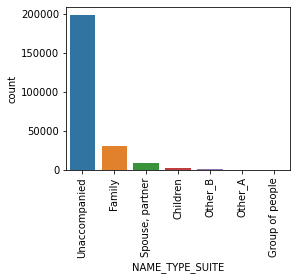

In [36]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(x = 'NAME_TYPE_SUITE', data = app, order = app['NAME_TYPE_SUITE'].value_counts().iloc[:7].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [37]:
app.NAME_INCOME_TYPE.value_counts()

Working                 125882
Commercial associate     56150
Pensioner                43914
State servant            18311
Student                     13
Businessman                  4
Unemployed                   2
Name: NAME_INCOME_TYPE, dtype: int64

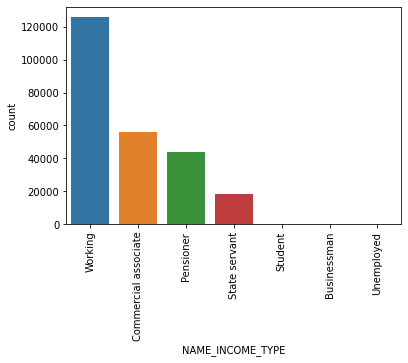

In [38]:
ax = sns.countplot(x = 'NAME_INCOME_TYPE', data = app, order = app['NAME_INCOME_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [39]:
app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    172100
Higher education                  61386
Incomplete higher                  7819
Lower secondary                    2835
Academic degree                     136
Name: NAME_EDUCATION_TYPE, dtype: int64

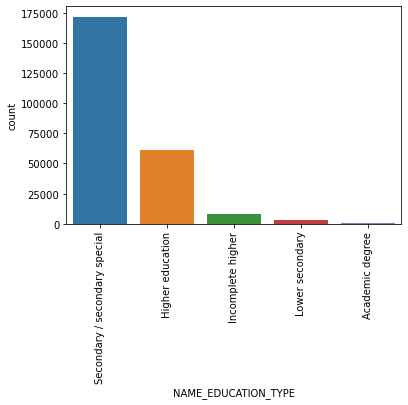

In [40]:
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app, order = app['NAME_EDUCATION_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

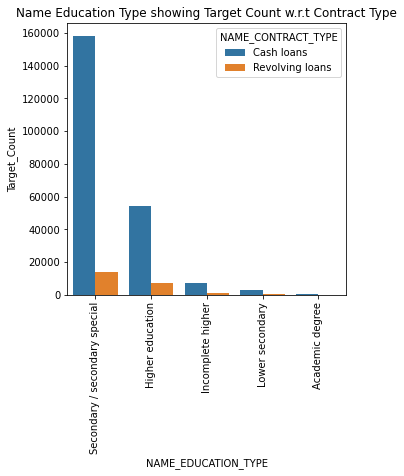

In [41]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(x="NAME_EDUCATION_TYPE",y="Target_Count",hue="NAME_CONTRACT_TYPE",data = app, estimator = np.sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("Name Education Type showing Target Count w.r.t Contract Type")
plt.show()

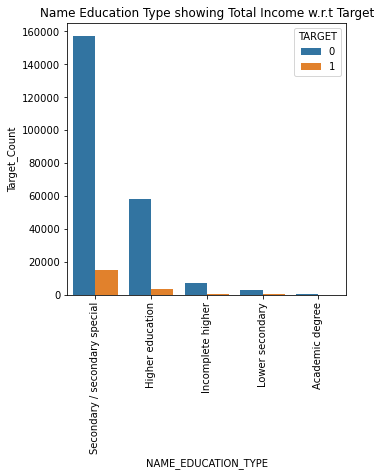

In [42]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(x="NAME_EDUCATION_TYPE",y="Target_Count",hue="TARGET",data = app, estimator = np.sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("Name Education Type showing Total Income w.r.t Target")
plt.show()

In [43]:
app.NAME_FAMILY_STATUS.value_counts()

Married                 158978
Single / not married     34009
Civil marriage           22492
Separated                16009
Widow                    12788
Name: NAME_FAMILY_STATUS, dtype: int64

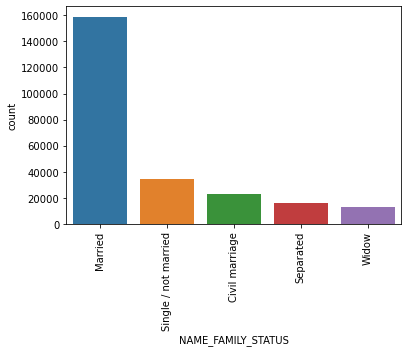

In [44]:
ax = sns.countplot(x = 'NAME_FAMILY_STATUS', data = app, order = app['NAME_FAMILY_STATUS'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

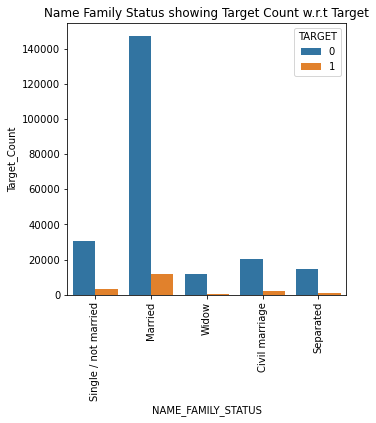

In [45]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(x="NAME_FAMILY_STATUS",y="Target_Count",hue="TARGET",data = app , estimator = np.sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("Name Family Status showing Target Count w.r.t Target")
plt.show()

In [46]:
app.NAME_HOUSING_TYPE.value_counts()

House / apartment      217798
With parents            11176
Municipal apartment      8737
Rented apartment         3589
Office apartment         2062
Co-op apartment           914
Name: NAME_HOUSING_TYPE, dtype: int64

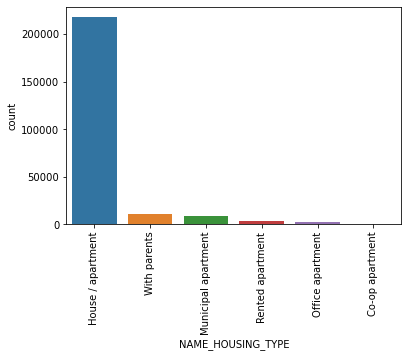

In [47]:
ax = sns.countplot(x = 'NAME_HOUSING_TYPE', data = app, order = app['NAME_HOUSING_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [48]:
app.WEEKDAY_APPR_PROCESS_START.value_counts()

WEDNESDAY    42034
TUESDAY      41722
FRIDAY       40510
THURSDAY     40309
MONDAY       39817
SATURDAY     27270
SUNDAY       12614
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

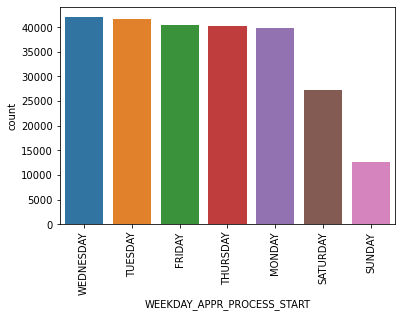

In [49]:
ax = sns.countplot(x = 'WEEKDAY_APPR_PROCESS_START', data = app, order = app['WEEKDAY_APPR_PROCESS_START'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [50]:
app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    53226
XNA                       43909
Self-employed             28535
Other                     13374
Medicine                   9463
Business Entity Type 2     8795
Government                 8690
School                     7488
Trade: type 7              5941
Kindergarten               5746
Construction               5180
Business Entity Type 1     4878
Transport: type 4          4292
Industry: type 9           2843
Trade: type 3              2769
Industry: type 3           2669
Security                   2580
Housing                    2394
Industry: type 11          2208
Military                   2195
Bank                       2063
Police                     2038
Transport: type 2          1926
Agriculture                1861
Security Ministries        1735
Postal                     1708
Trade: type 2              1428
Restaurant                 1353
Services                   1207
University                 1097
Industry: type 7           1083
Transpor

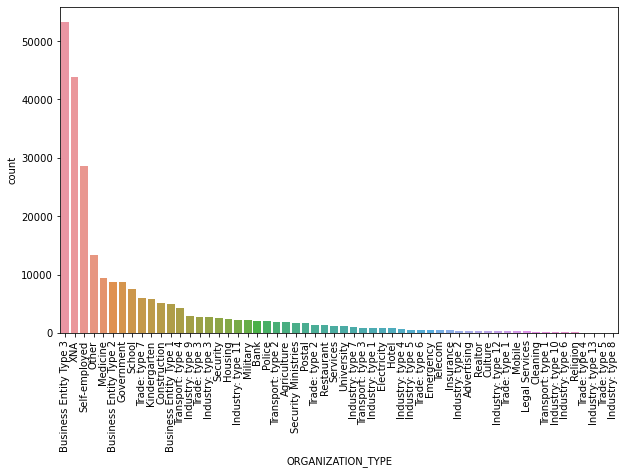

In [51]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'ORGANIZATION_TYPE', data = app, order = app['ORGANIZATION_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [52]:
# Lets analyze numerical columns
app.dtypes[app.dtypes != 'object'].keys().tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'Target_Count']

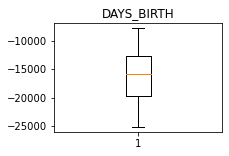

In [53]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.DAYS_BIRTH)
plt.title("DAYS_BIRTH")
plt.show()

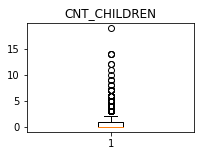

In [54]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.CNT_CHILDREN)
plt.title("CNT_CHILDREN")
plt.show()

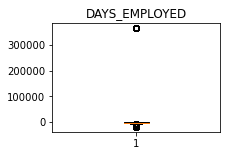

In [55]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.DAYS_EMPLOYED)
plt.title("DAYS_EMPLOYED")
plt.show()

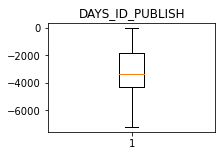

In [56]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.DAYS_ID_PUBLISH)
plt.title("DAYS_ID_PUBLISH")
plt.show()

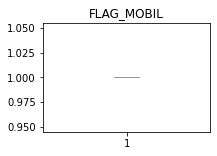

In [57]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.FLAG_MOBIL)
plt.title("FLAG_MOBIL")
plt.show()

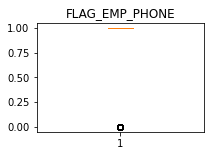

In [58]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.FLAG_EMP_PHONE)
plt.title("FLAG_EMP_PHONE")
plt.show()

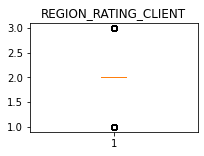

In [59]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.REGION_RATING_CLIENT)
plt.title("REGION_RATING_CLIENT")
plt.show()

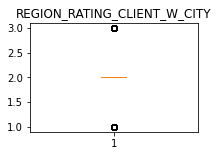

In [60]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.REGION_RATING_CLIENT_W_CITY)
plt.title("REGION_RATING_CLIENT_W_CITY")
plt.show()

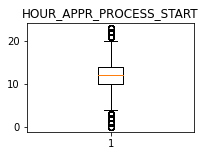

In [61]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.HOUR_APPR_PROCESS_START)
plt.title("HOUR_APPR_PROCESS_START")
plt.show()

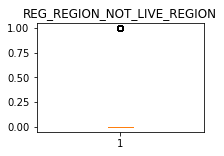

In [62]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.REG_REGION_NOT_LIVE_REGION)
plt.title("REG_REGION_NOT_LIVE_REGION")
plt.show()

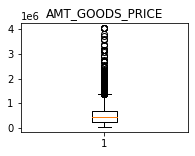

In [63]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.AMT_GOODS_PRICE )
plt.title("AMT_GOODS_PRICE")
plt.show()

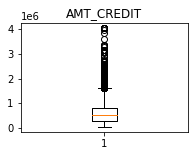

In [64]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.AMT_CREDIT)
plt.title("AMT_CREDIT")
plt.show()

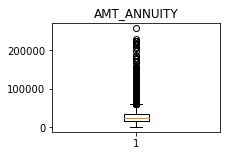

In [65]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.AMT_ANNUITY)
plt.title("AMT_ANNUITY")
plt.show()

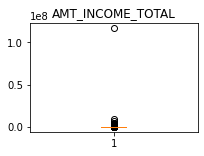

In [66]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.AMT_INCOME_TOTAL)
plt.title("AMT_INCOME_TOTAL")
plt.show()

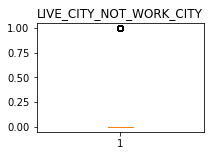

In [67]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.LIVE_CITY_NOT_WORK_CITY)
plt.title("LIVE_CITY_NOT_WORK_CITY")
plt.show()

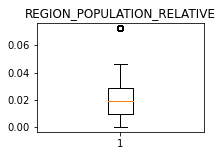

In [68]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.REGION_POPULATION_RELATIVE)
plt.title("REGION_POPULATION_RELATIVE")
plt.show()

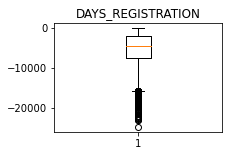

In [69]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.DAYS_REGISTRATION)
plt.title("DAYS_REGISTRATION")
plt.show()

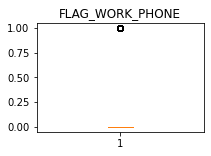

In [70]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.FLAG_WORK_PHONE)
plt.title("FLAG_WORK_PHONE")
plt.show()

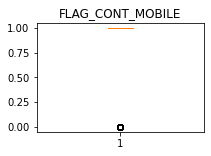

In [71]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.FLAG_CONT_MOBILE)
plt.title("FLAG_CONT_MOBILE")
plt.show()

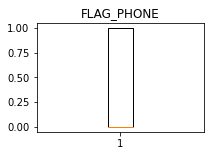

In [72]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.FLAG_PHONE)
plt.title("FLAG_PHONE")
plt.show()

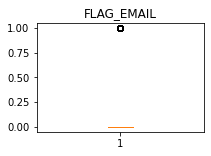

In [73]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.FLAG_EMAIL)
plt.title("FLAG_EMAIL")
plt.show()

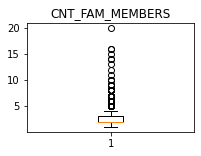

In [74]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.CNT_FAM_MEMBERS)
plt.title("CNT_FAM_MEMBERS")
plt.show()

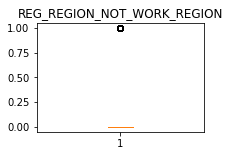

In [75]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.REG_REGION_NOT_WORK_REGION)
plt.title("REG_REGION_NOT_WORK_REGION")
plt.show()

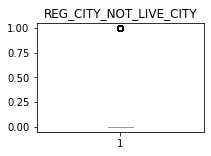

In [76]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.REG_CITY_NOT_LIVE_CITY)
plt.title("REG_CITY_NOT_LIVE_CITY")
plt.show()

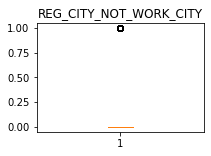

In [77]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.REG_CITY_NOT_WORK_CITY)
plt.title("REG_CITY_NOT_WORK_CITY")
plt.show()

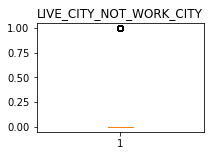

In [78]:
plt.figure(figsize=(3, 2))
plt.boxplot(app.LIVE_CITY_NOT_WORK_CITY)
plt.title("LIVE_CITY_NOT_WORK_CITY")
plt.show()

In [79]:
Int_list = app[['AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]

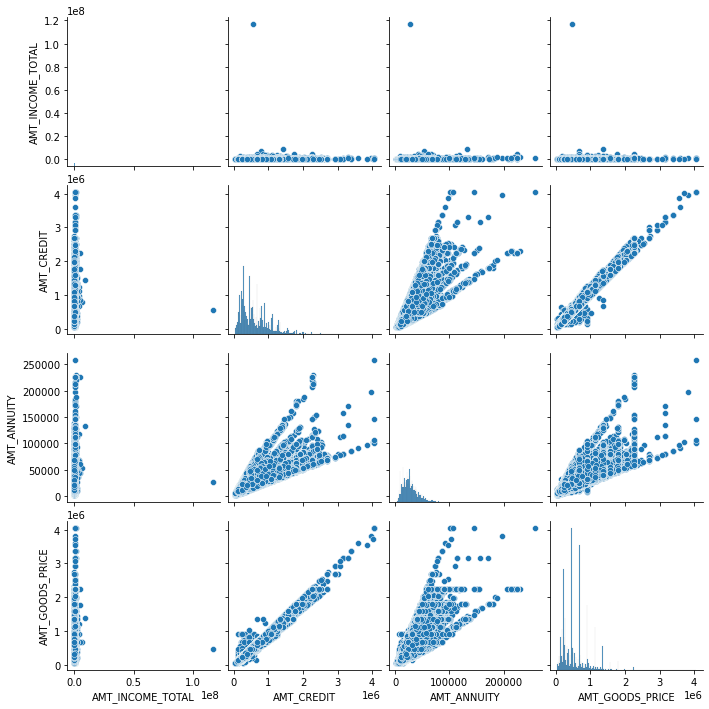

In [80]:
sns.pairplot(Int_list)
plt.show()

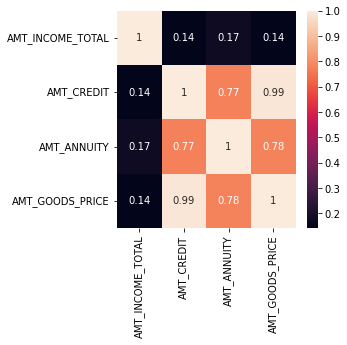

In [81]:
plt.figure(figsize=(4, 4))
sns.heatmap(Int_list.corr(), annot = True)
plt.show()

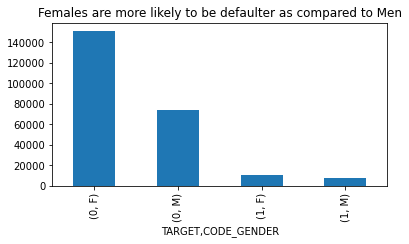

In [82]:
mean = app.groupby(['TARGET', 'CODE_GENDER'])['CODE_GENDER'].count()
mean.keys()

Headers = list(mean.keys())
values = list(mean.values)

fig = plt.figure(figsize = (6, 3))
plt.title("Females are more likely to be defaulter as compared to Men")
 
# creating the bar plot
mean.plot.bar()
plt.show()

In [83]:
df = app[['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START']]

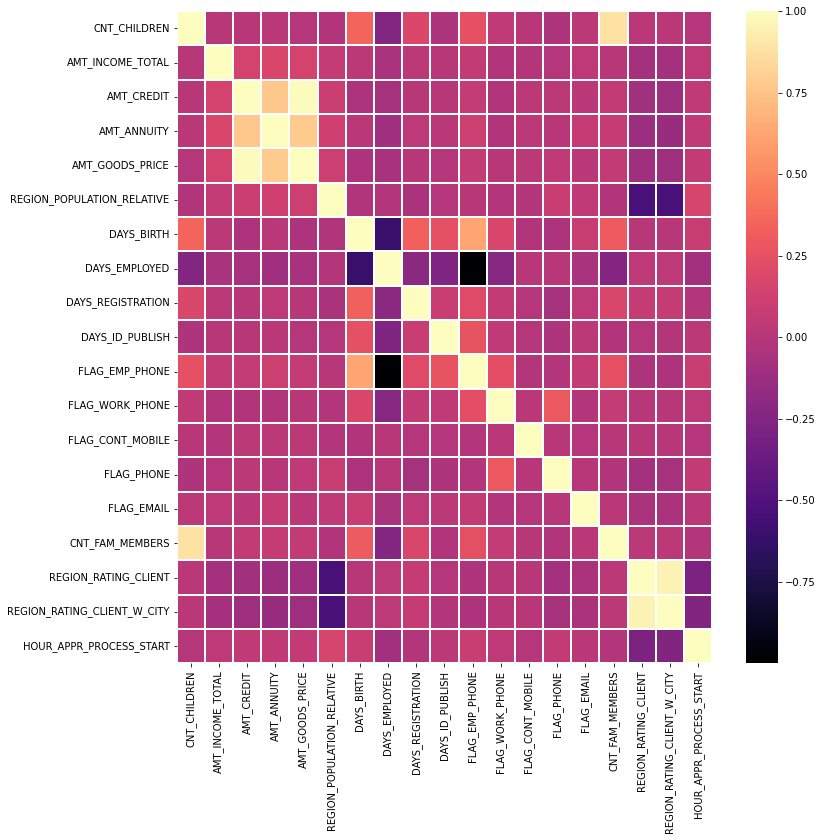

In [84]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap="magma", linewidth = 1.5)
plt.show()

## Analyzing Previous Application Data

In [85]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [87]:
prev_app.keys()

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [88]:
prev_app['Target_Count'] = 1

In [89]:
Drop_cols = (((prev_app.isnull().sum()/prev_app.shape[0])*100)[((prev_app.isnull().sum()/prev_app.shape[0])*100) > 0]).keys().to_list()

In [90]:
prev_app.drop(Drop_cols, axis = 1, inplace = True)

In [91]:
prev_app.dropna(axis = 0, inplace = True)
prev_app.shape

(1670214, 22)

In [92]:
prev_app.dtypes[prev_app.dtypes != 'object']

SK_ID_PREV                   int64
SK_ID_CURR                   int64
AMT_APPLICATION            float64
HOUR_APPR_PROCESS_START      int64
NFLAG_LAST_APPL_IN_DAY       int64
DAYS_DECISION                int64
SELLERPLACE_AREA             int64
Target_Count                 int64
dtype: object

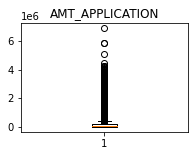

In [93]:
plt.figure(figsize = (3,2))
plt.boxplot(prev_app.AMT_APPLICATION)
plt.title("AMT_APPLICATION")
plt.show()

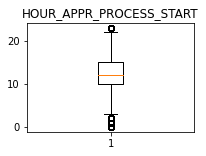

In [94]:
plt.figure(figsize = (3,2))
plt.boxplot(prev_app.HOUR_APPR_PROCESS_START)
plt.title("HOUR_APPR_PROCESS_START")
plt.show()

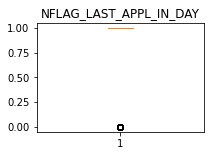

In [95]:
plt.figure(figsize = (3,2))
plt.boxplot(prev_app.NFLAG_LAST_APPL_IN_DAY)
plt.title("NFLAG_LAST_APPL_IN_DAY")
plt.show()

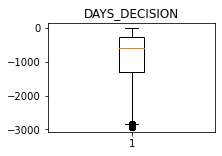

In [96]:
plt.figure(figsize = (3,2))
plt.boxplot(prev_app.DAYS_DECISION)
plt.title("DAYS_DECISION")
plt.show()

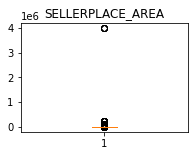

In [97]:
plt.figure(figsize = (3,2))
plt.boxplot(prev_app.SELLERPLACE_AREA)
plt.title("SELLERPLACE_AREA")
plt.show()

In [98]:
prev_app.dtypes[prev_app.dtypes == 'object']

NAME_CONTRACT_TYPE             object
WEEKDAY_APPR_PROCESS_START     object
FLAG_LAST_APPL_PER_CONTRACT    object
NAME_CASH_LOAN_PURPOSE         object
NAME_CONTRACT_STATUS           object
NAME_PAYMENT_TYPE              object
CODE_REJECT_REASON             object
NAME_CLIENT_TYPE               object
NAME_GOODS_CATEGORY            object
NAME_PORTFOLIO                 object
NAME_PRODUCT_TYPE              object
CHANNEL_TYPE                   object
NAME_SELLER_INDUSTRY           object
NAME_YIELD_GROUP               object
dtype: object

In [99]:
prev_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [100]:
prev_app.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [101]:
prev_app.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

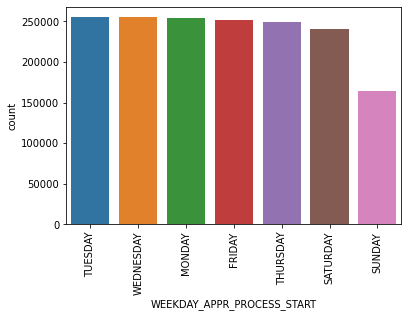

In [102]:
ax = sns.countplot(x = 'WEEKDAY_APPR_PROCESS_START', data = prev_app, order = prev_app['WEEKDAY_APPR_PROCESS_START'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [103]:
prev_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [104]:
prev_app.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [105]:
prev_app.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [106]:
prev_app.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

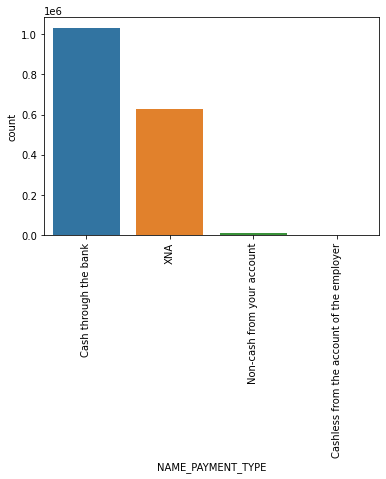

In [107]:
ax = sns.countplot(x = 'NAME_PAYMENT_TYPE', data = prev_app, order = prev_app['NAME_PAYMENT_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [108]:
prev_app.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

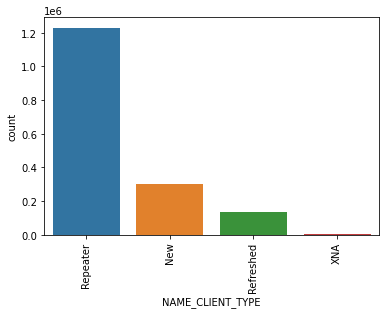

In [109]:
ax = sns.countplot(x = 'NAME_CLIENT_TYPE', data = prev_app, order = prev_app['NAME_CLIENT_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

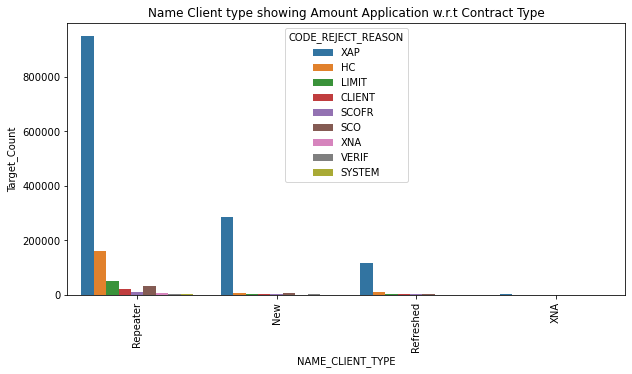

In [110]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="NAME_CLIENT_TYPE",y="Target_Count",hue="CODE_REJECT_REASON",data = prev_app, estimator = np.sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("Name Client type showing Amount Application w.r.t Contract Type")
plt.show()

In [111]:
prev_app.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

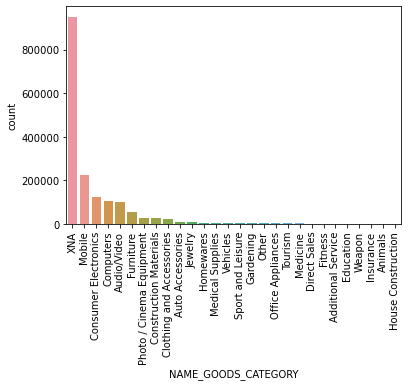

In [112]:
ax = sns.countplot(x = 'NAME_GOODS_CATEGORY', data = prev_app, order = prev_app['NAME_GOODS_CATEGORY'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [113]:
prev_app.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [114]:
prev_app.NAME_PRODUCT_TYPE.value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

In [115]:
prev_app.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

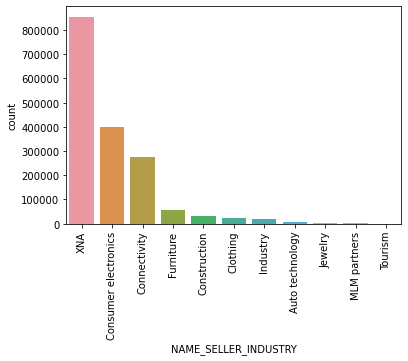

In [116]:
ax = sns.countplot(x = 'NAME_SELLER_INDUSTRY', data = prev_app, order = prev_app['NAME_SELLER_INDUSTRY'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [117]:
prev_app.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [118]:
df2 = prev_app[['AMT_APPLICATION',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA']]

<AxesSubplot:>

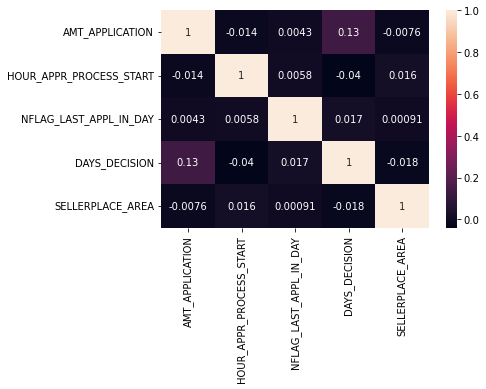

In [119]:
sns.heatmap(df2.corr(), annot = True)

## Merging datafiles - Application data and Previous Application data

In [120]:
app.shape

(244276, 47)

In [121]:
prev_app.shape

(1670214, 22)

In [122]:
data_merge = pd.merge(app, prev_app, on='SK_ID_CURR', how='inner')
data_merge.shape

(1164934, 68)

In [123]:
data_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,Target_Count_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,1
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,1
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,110,Consumer electronics,low_normal,1
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,1
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,XAP,New,Mobile,POS,XNA,Country-wide,50,Connectivity,low_normal,1


In [124]:
data_merge.keys()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
 

In [125]:
data_merge.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Target_Count_x,SK_ID_PREV,AMT_APPLICATION,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,Target_Count_y
count,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,...,1.164934e+06,1.164934e+06,1164934.0,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,1.164934e+06,1164934.0
mean,2.785073e+05,8.457647e-02,4.105100e-01,1.761216e+05,5.944609e+05,2.710538e+04,5.337864e+05,2.067613e-02,-1.637817e+04,6.834568e+04,...,1.083667e-01,-1.108362e+03,1.0,1.922918e+06,1.774591e+05,1.251999e+01,9.963706e-01,-8.909627e+02,3.140345e+02,1.0
std,1.028436e+05,2.782505e-01,7.216654e-01,2.104404e+05,3.869471e+05,1.386701e+04,3.551563e+05,1.323948e-02,4.297105e+03,1.450724e+05,...,3.795926e-01,8.015662e+02,0.0,5.325232e+05,2.984692e+05,3.311163e+00,6.013502e-02,7.875915e+02,7.587715e+03,0.0
min,1.000020e+05,0.000000e+00,0.000000e+00,2.610000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.520100e+04,-1.791200e+04,...,0.000000e+00,-4.173000e+03,1.0,1.000004e+06,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,1.0
25%,1.892530e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.762775e+05,1.687500e+04,2.385000e+05,1.003200e-02,-1.999800e+04,-2.914000e+03,...,0.000000e+00,-1.705000e+03,1.0,1.461718e+06,1.976501e+04,1.000000e+01,1.000000e+00,-1.340000e+03,-1.000000e+00,1.0
50%,2.788780e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.172660e+05,2.503350e+04,4.500000e+05,1.885000e-02,-1.608700e+04,-1.327000e+03,...,0.000000e+00,-1.061000e+03,1.0,1.923002e+06,7.015500e+04,1.200000e+01,1.000000e+00,-5.940000e+02,4.000000e+00,1.0
75%,3.676270e+05,0.000000e+00,1.000000e+00,2.205000e+05,8.086500e+05,3.459600e+04,6.795000e+05,2.639200e-02,-1.286000e+04,-2.980000e+02,...,0.000000e+00,-4.170000e+02,1.0,2.383818e+06,1.800000e+05,1.500000e+01,1.000000e+00,-2.730000e+02,8.400000e+01,1.0
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,-7.676000e+03,3.652430e+05,...,2.400000e+01,0.000000e+00,1.0,2.845381e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,1.0


In [126]:
data_merge.isnull().sum()[data_merge.isnull().sum()!= 0]

Series([], dtype: int64)

In [127]:
data_merge.NAME_CONTRACT_STATUS.value_counts()

Approved        724450
Canceled        212775
Refused         207079
Unused offer     20630
Name: NAME_CONTRACT_STATUS, dtype: int64

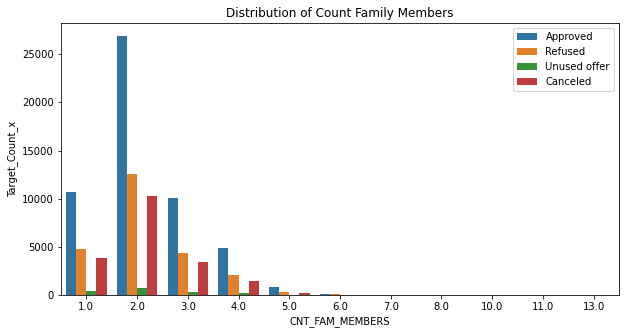

In [128]:
plt.figure(figsize=(10, 5))
sns.barplot(x="CNT_FAM_MEMBERS",y="Target_Count_x",hue = 'NAME_CONTRACT_STATUS',data = data_merge[data_merge.TARGET == 1], estimator = np.sum)
plt.legend(loc = 'upper right')
plt.title("Distribution of Count Family Members")
plt.show()

In [129]:
data_merge['AGE'] = data_merge.DAYS_BIRTH*(-1)/365

In [130]:
data_merge['Age'] = pd.cut(x=data_merge['AGE'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

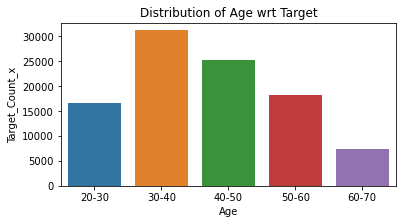

In [131]:
plt.figure(figsize=(6, 3))
sns.barplot(x="Age",y="Target_Count_x",data = data_merge[data_merge.TARGET == 1], estimator = np.sum)
plt.title("Distribution of Age wrt Target")
plt.show()

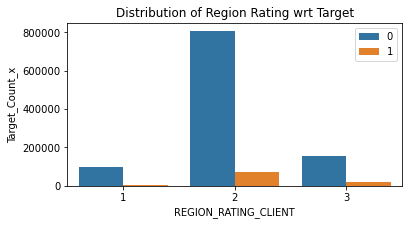

In [132]:
plt.figure(figsize=(6, 3))
sns.barplot(x="REGION_RATING_CLIENT",y="Target_Count_x",hue = 'TARGET',data = data_merge, estimator = np.sum)
plt.legend(loc = 'upper right')
plt.title("Distribution of Region Rating wrt Target")
plt.show()

In [133]:
data_merge.AMT_CREDIT.value_counts().keys().sort_values()

Float64Index([  45000.0,   47970.0,   48519.0,   49455.0,   49500.0,   49752.0,
                50940.0,   52128.0,   52767.0,   53910.0,
              ...
              2695500.0, 2700000.0, 2931660.0, 3020760.0, 3060000.0, 3150000.0,
              3375000.0, 3860019.0, 3956274.0, 4050000.0],
             dtype='float64', length=5051)

In [134]:
data_merge['Credit_Amount'] = pd.cut(x=data_merge['AMT_CREDIT'],
                                     bins=[0, 100000,200000,300000,400000,500000,600000,700000,800000,900000,100000000
                                          ], labels=['0-100k', '100-200k', '200-300k', '300-400k', '400-500k', '500-600k', '600-700k', '700-800k', '800-900k', '900-1000k'])

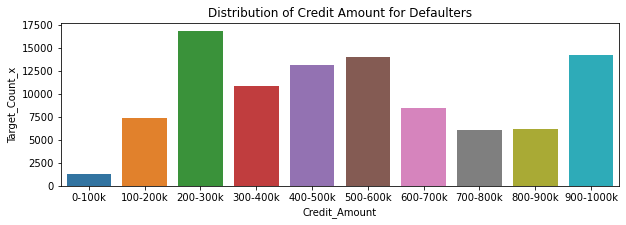

In [135]:
plt.figure(figsize=(10, 3))
sns.barplot(x="Credit_Amount",y="Target_Count_x",data = data_merge[data_merge.TARGET == 1], estimator = np.sum)
plt.title("Distribution of Credit Amount for Defaulters")
plt.show()

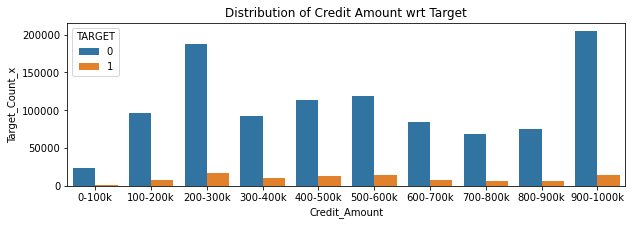

In [136]:
plt.figure(figsize=(10, 3))
sns.barplot(x="Credit_Amount",y="Target_Count_x",hue = "TARGET", data = data_merge, estimator = np.sum)
plt.title("Distribution of Credit Amount wrt Target")
plt.show()

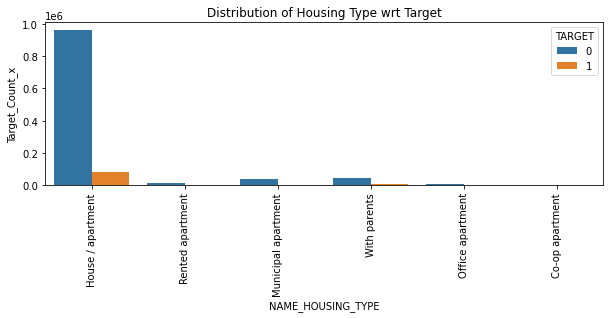

In [137]:
plt.figure(figsize=(10, 3))
ax = sns.barplot(x="NAME_HOUSING_TYPE",y="Target_Count_x",hue = "TARGET", data = data_merge, estimator = np.sum)
plt.title("Distribution of Housing Type wrt Target")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

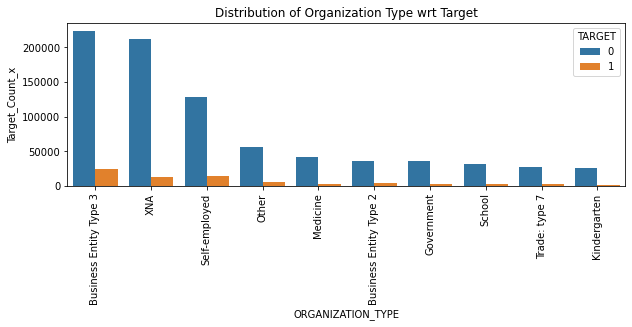

In [138]:
plt.figure(figsize=(10, 3))
ax = sns.barplot(x="ORGANIZATION_TYPE",y="Target_Count_x",hue = "TARGET", data = data_merge, 
                 order = data_merge.ORGANIZATION_TYPE.value_counts().iloc[:10].index, estimator = np.sum)
plt.title("Distribution of Organization Type wrt Target")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()